<a href="https://colab.research.google.com/github/MkrtchyanKarina/face_detection/blob/main/DE_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Расчетно-графическая работа №1** по дисциплине "Дифференциальные уравнения"


Тема: **Неявные методы решения ДУ**

Выполнили студенты группы K3241 (Мобильные и сетевые технологии): Мкртчян Карина, Левчук Софья, Иванова Аайа.

I **Метод Эйлера** — это простейший численный метод решения обыкновенных дифференциальных уравнений и задач Коши. Он аппроксимирует решение с помощью ломаной линии, где каждая новая точка вычисляется на основе предыдущей и значения производной.

 Снимок экрана 2025-11-14 210401.png

II
**Явный метод трапеций** - это численный метод для приближенного решения обыкновенных дифференциальных уравнений. Он использует формулу трапеции для аппроксимации интеграла, но является явным, что означает, что следующее значение вычисляется непосредственно, без необходимости решать уравнение на каждой итерации. Это делает его проще в реализации, чем неявный вариант, но может привести к нестабильности при больших шагах интегрирования.

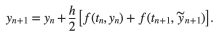

image.png

III **Метод Рунге-Кутты 4-го порядка (RK4)** — это наиболее распространенный численный метод для решения обыкновенных дифференциальных уравнений первого порядка путем нахождения приближенного значения \(y\) в точках \(x\). Он использует четыре промежуточных вычисления (k1, k2, k3, k4) на каждом шаге для достижения большей точности по сравнению с более простыми методами, такими как метод Эйлера.

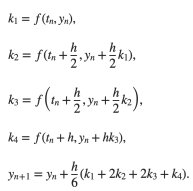

IV **Обратный (или неявный) метод Эйлера** — это итерационный численный метод для решения обыкновенных дифференциальных уравнений (ОДУ), который на каждом шаге использует значение производной на правом (будущем) крае интервала

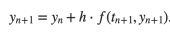

V **Неявный метод трапеций**— это метод численного решения дифференциальных уравнений, в котором для нахождения следующего значения (y_{n+1}) используется формула, связывающая его со значением в предыдущей точке (y_n) через функцию от обоих состояний:

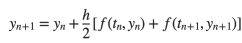

VI **Неявные методы Рунге-Кутты** представляют собой класс численных интеграторов для обыкновенных дифференциальных уравнений,
которые вычисляют функцию f в промежуточных точках на каждом шаге, где значения в этих точках неявно зависят от решения в конце шага.

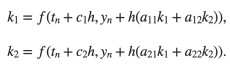

image.png

In [ ]:
from math import *
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import numpy as np

In [ ]:
def euler_method(y_start, y_diff, h, N, t_values):
  y_actual = [y_start]
  for i in range(N):
    y_actual += [y_actual[i] + h*y_diff(t_values[i], y_actual[i])]
  return y_actual

In [ ]:
def explicit_trapezoid_method(y_start, y_diff, h, N, t_values):
  y_euler = euler_method(y_start, y_diff, h, N, t_values)
  y_actual = [y_start]
  for i in range(N):
    y_actual += [y_actual[i] + (h/2) * (y_diff(t_values[i], y_actual[i]) + y_diff(t_values[i+1], y_euler[i+1]))]
  return y_actual

In [ ]:
def runge_kutta_method(y_start, y_diff, h, N, t_values):
  y_actual = [y_start]
  for i in range(N):
    t_n = t_values[i]
    y_n = y_actual[i]
    k1 = y_diff(t_n, y_n)
    k2 = y_diff(t_n + h/2, y_n + h/2*k1)
    k3 = y_diff(t_n + h/2, y_n + h/2*k2)
    k4 = y_diff(t_n + h, y_n + h*k3)
    y_actual += [y_n + h/6 * (k1 + 2*k2 + 2*k3 + k4)]
  return y_actual

In [ ]:
def backward_euler_method(y_start, y_diff, h, N, t_values):
  y_actual = [y_start]
  for i in range(N):
    G = lambda z: z - h * y_diff(t_values[i+1], z) - y_actual[i]
    y_guess = fsolve(G, y_actual[i] + h*y_diff(t_values[i], y_actual[i]))[0]
    y_actual += [y_actual[i] + h*y_diff(t_values[i+1], y_guess)]
  return y_actual

In [ ]:
def implicit_trapezoid_method(y_start, y_diff, h, N, t_values):
  y_actual = [y_start]
  for i in range(N):
    G = lambda z: z - h * y_diff(t_values[i+1], z) - y_actual[i]
    y_guess = fsolve(G, y_actual[i] + h*y_diff(t_values[i], y_actual[i]))[0]
    y_actual += [y_actual[i] + (h/2) * (y_diff(t_values[i], y_actual[i]) + y_diff(t_values[i+1], y_guess))]
  return y_actual

In [ ]:
def implicit_runge_kutta_method(y_start, y_diff, h, N, t_values):
  c1, c2 = 1/2 - sqrt(3)/6, 1/2 + sqrt(3)/6 # nodes
  a11, a12, a21, a22 = 1/4, 1/4 - sqrt(3)/6, 1/4 + sqrt(3)/6, 1/4  # matrix
  b1, b2 = 1/2, 1/2  # weights

  y_actual = [y_start]
  for i in range(N):
    def equations(k):
      k1, k2 = k
      G1 = k1 - y_diff(t_values[i] + c1*h, y_actual[i] + h*(a11*k1 + a12*k2))
      G2 = k2 - y_diff(t_values[i] + c2*h, y_actual[i] + h*(a21*k1 + a22*k2))
      return [G1, G2]

    k_guess = [y_diff(t_values[i], y_actual[i]), y_diff(t_values[i], y_actual[i])]
    k1, k2 = fsolve(equations, k_guess)

    y_actual += [y_actual[i] + h*(b1*k1 + b2*k2)]
  return y_actual



In [ ]:
def draw_result(t_values, y_actual, y_expected):
  plt.clf()
  plt.plot(t_values, y_actual, color="purple")
  if isinstance(y_expected, np.ndarray):
    plt.plot(t_values, y_expected, color="red")
  else:
    plt.plot(t_values, [y_expected(i) for i in t_values], color="red")

Первое уравнение

In [ ]:
y_diff_1 = lambda t, y: -y + t**3
y_start_1 = 0
t_start_1 = 0
t_end_1 = 2
y_expected_1 = lambda t: t**3 - 3*t**2 + 6*t - 6 + 6*exp(-t)

In [ ]:
h_1 = 0.1
N_1 = int((t_end_1 - t_start_1) // h_1)
t_values_1 = [t_start_1 + h_1*i for i in range(N_1 + 1)]

**Решение первого уравнения**

Метод Эйлера

In [ ]:
y_euler_1 = euler_method(y_start_1, y_diff_1, h_1, N_1, t_values_1)

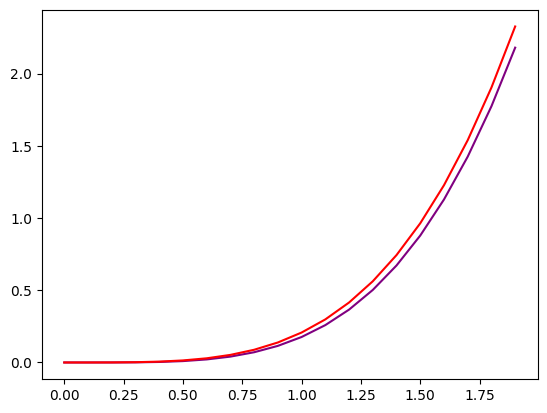

In [ ]:
draw_result(t_values_1, y_euler_1, y_expected_1)

Явный метод трапеций

In [ ]:
y_trapezoid_1 = explicit_trapezoid_method(y_start_1, y_diff_1, h_1, N_1, t_values_1)

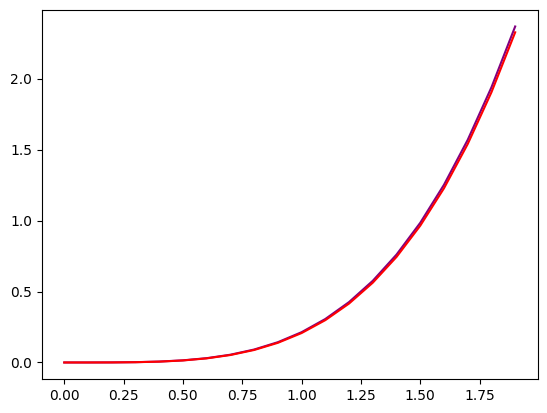

In [ ]:
draw_result(t_values_1, y_trapezoid_1, y_expected_1)

Метод Рунге-Кутта 4-го порядка

In [ ]:
y_runge_kutta_1 = runge_kutta_method(y_start_1, y_diff_1, h_1, N_1, t_values_1)

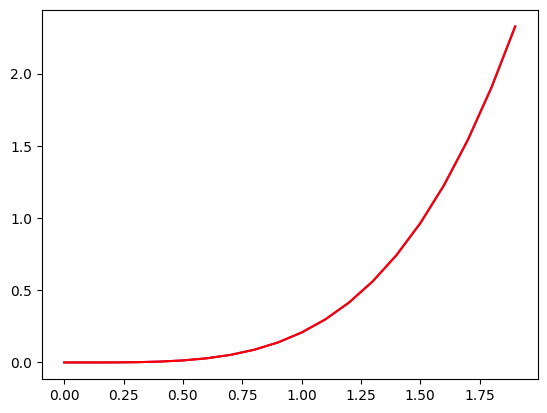

In [ ]:
draw_result(t_values_1, y_runge_kutta_1, y_expected_1)

Обратный метод Эйлера

In [ ]:
y_backward_euler_1 = backward_euler_method(y_start_1, y_diff_1, h_1, N_1, t_values_1)

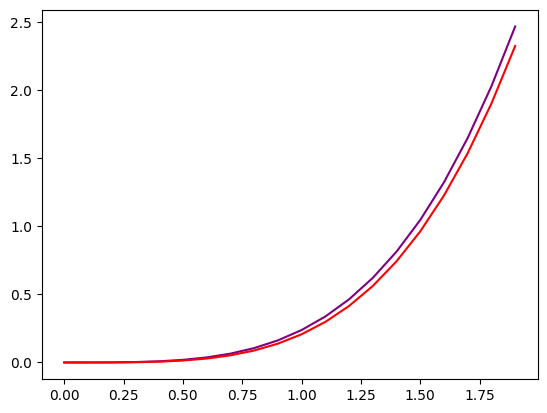

In [ ]:
draw_result(t_values_1, y_backward_euler_1, y_expected_1)

Неявный метод трапеций

In [ ]:
y_implicit_trapezoid_1 = implicit_trapezoid_method(y_start_1, y_diff_1, h_1, N_1, t_values_1)

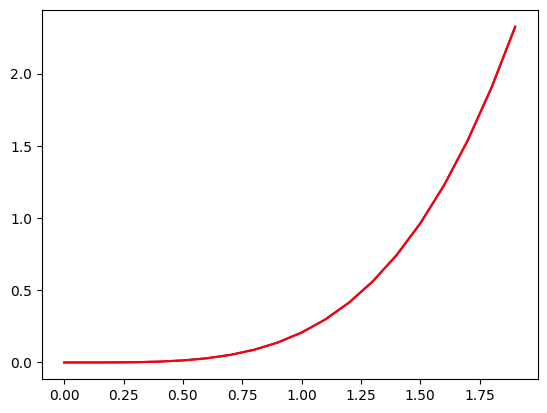

In [ ]:
draw_result(t_values_1, y_implicit_trapezoid_1, y_expected_1)

Неявный метод Рунге-Кутты

In [ ]:
y_implicit_runge_kutta_1 = implicit_runge_kutta_method(y_start_1, y_diff_1, h_1, N_1, t_values_1)

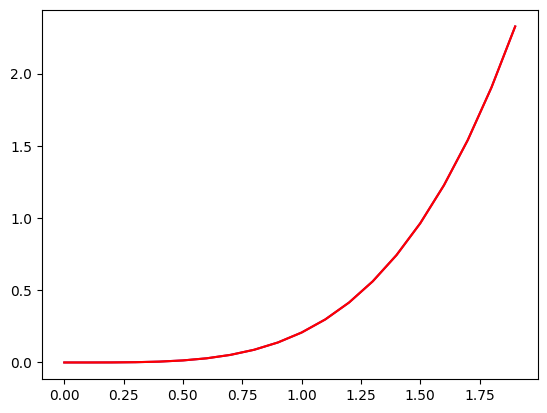

In [ ]:
draw_result(t_values_1, y_implicit_runge_kutta_1, y_expected_1)

**Расчет ошибки**

In [ ]:
error_euler_1 = [np.linalg.norm(y_euler_1[i] - [y_expected_1(t) for t in t_values_1][i]) for i in range(N_1+1)]

error_trapezoid_1 = [np.linalg.norm(y_trapezoid_1[i] - [y_expected_1(t) for t in t_values_1][i]) for i in range(N_1+1)]

error_runge_kutta_1 = [np.linalg.norm(y_runge_kutta_1[i] - [y_expected_1(t) for t in t_values_1][i]) for i in range(N_1+1)]

error_backward_euler_1 = [np.linalg.norm(y_backward_euler_1[i] - [y_expected_1(t) for t in t_values_1][i]) for i in range(N_1+1)]

error_implicit_trapezoid_1 = [np.linalg.norm(y_implicit_trapezoid_1[i] - [y_expected_1(t) for t in t_values_1][i]) for i in range(N_1+1)]

error_implicit_runge_kutta_1 = [np.linalg.norm(y_implicit_runge_kutta_1[i] - [y_expected_1(t) for t in t_values_1][i]) for i in range(N_1+1)]

In [ ]:
print(f'euler: {round(max(error_euler_1), 4)} \t\t backward_euler: {round(max(error_backward_euler_1), 4)} \n'
  f'trapezoid: {round(max(error_trapezoid_1), 6)} \t implicit_trapezoid: {round(max(error_implicit_trapezoid_1), 6)} \n'
  f'runge_kutta: {round(max(error_runge_kutta_1), 7)} \t implicit_runge_kutta: {round(max(error_implicit_runge_kutta_1), 7)}')

euler: 0.1466 		 backward_euler: 0.1434 
trapezoid: 0.041062 	 implicit_trapezoid: 0.004077 
runge_kutta: 4.5e-06 	 implicit_runge_kutta: 9e-07


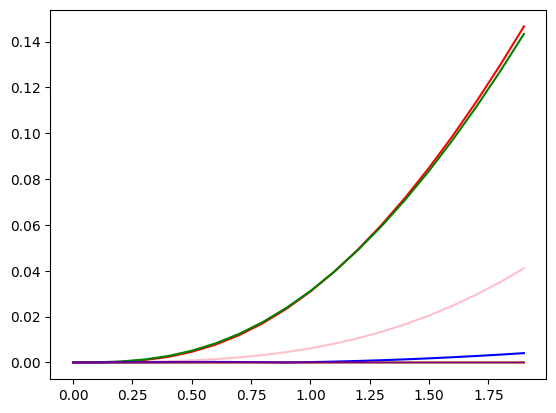

In [ ]:
plt.plot(t_values_1, error_euler_1, color="red")

plt.plot(t_values_1, error_trapezoid_1, color="pink")

plt.plot(t_values_1, error_runge_kutta_1, color="yellow")

plt.plot(t_values_1, error_backward_euler_1, color="green")

plt.plot(t_values_1, error_implicit_trapezoid_1, color="blue")

plt.plot(t_values_1, error_implicit_runge_kutta_1, color="purple")

**Решение второго уравнения**

Второе уравнение

In [ ]:
t_start_2 = 0
t_end_2 = 0.2

h_2 = 0.0005
N_2 = int((t_end_2 - t_start_2) // h_2)
t_values_2 = [t_start_2 + h_2 * i for i in range(N_2 + 1)]

In [ ]:
y_diff_2 = lambda t, y: -3000 * y + 3000 * exp(-10*t)
y_start_2 = 0

y_expected_2 = solve_ivp(y_diff_2, (t_start_2, t_end_2), [y_start_2], method='BDF', rtol=1e-12, atol=1e-14, dense_output=True, t_eval= t_values_2).y[0]

Метод Эйлера

In [ ]:
y_euler_2 = euler_method(y_start_2, y_diff_2, h_2, N_2, t_values_2)

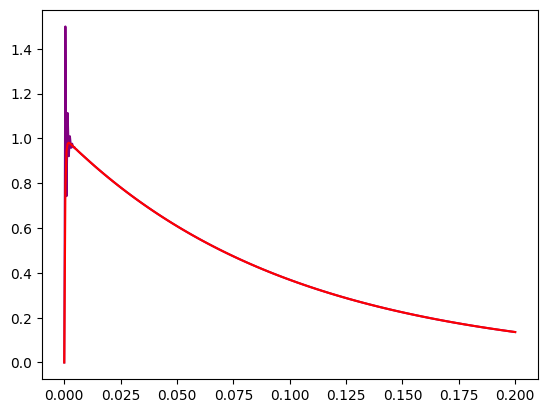

In [ ]:
draw_result(t_values_2, y_euler_2, y_expected_2)

Явный метод трапеций

In [ ]:
y_trapezoid_2 = explicit_trapezoid_method(y_start_2, y_diff_2, h_2, N_2, t_values_2)

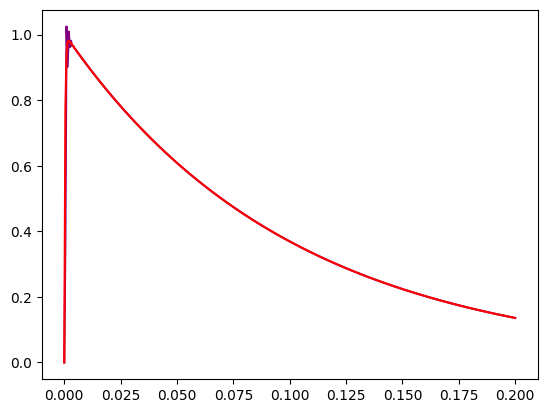

In [ ]:
draw_result(t_values_2, y_trapezoid_2, y_expected_2)

Метод Рунге-Кутта 4-го порядка

In [ ]:
y_runge_kutta_2 = runge_kutta_method(y_start_2, y_diff_2, h_2, N_2, t_values_2)

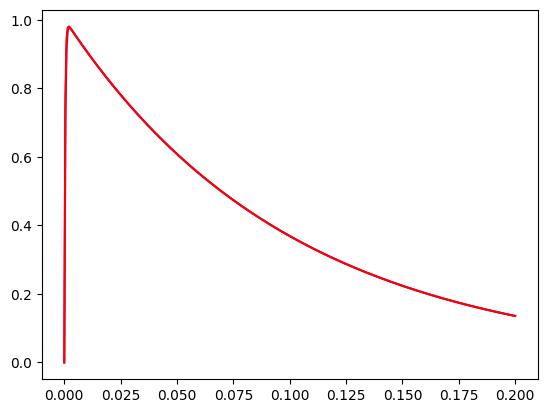

In [ ]:
draw_result(t_values_2, y_runge_kutta_2, y_expected_2)

Обратный метод Эйлера

In [ ]:
y_backward_euler_2 = backward_euler_method(y_start_2, y_diff_2, h_2, N_2, t_values_2)

/tmp/ipython-input-855715985.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y_guess = fsolve(G, y_actual[i] + h*y_diff(t_values[i], y_actual[i]))[0]


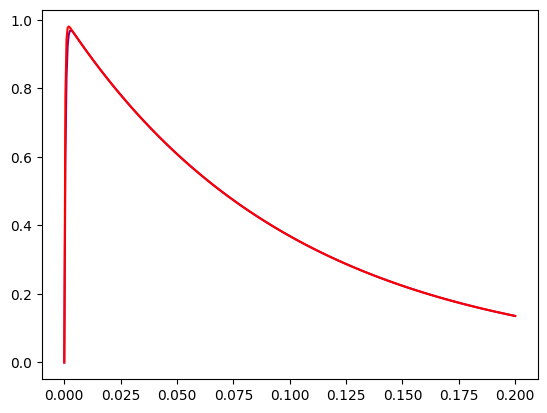

In [ ]:
draw_result(t_values_2, y_backward_euler_2, y_expected_2)

Неявный метод трапеций

In [ ]:
y_implicit_trapezoid_2 = implicit_trapezoid_method(y_start_2, y_diff_2, h_2, N_2, t_values_2)

/tmp/ipython-input-1294411472.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y_guess = fsolve(G, y_actual[i] + h*y_diff(t_values[i], y_actual[i]))[0]


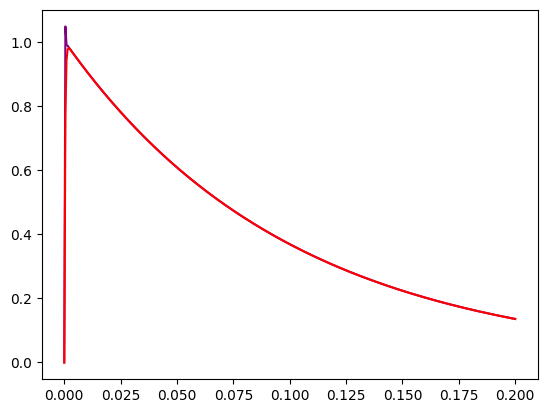

In [ ]:
draw_result(t_values_2, y_implicit_trapezoid_2, y_expected_2)

Неявный метод Рунге-Кутты

In [ ]:
y_implicit_runge_kutta_2 = implicit_runge_kutta_method(y_start_2, y_diff_2, h_2, N_2, t_values_2)

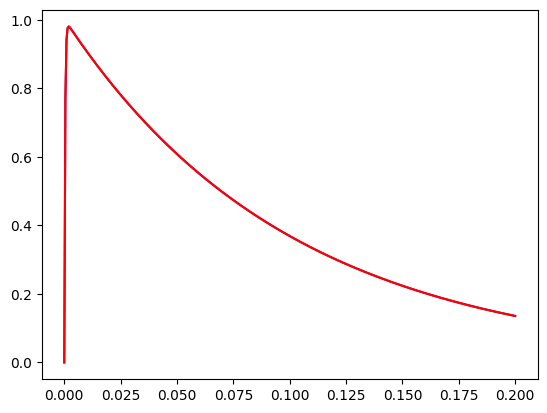

In [ ]:
draw_result(t_values_2, y_implicit_runge_kutta_2, y_expected_2)

**Расчет ошибки**

In [ ]:
error_euler_2 = [np.linalg.norm(y_euler_2[i] - y_expected_2[i]) for i in range(N_2+1)]

error_trapezoid_2 = [np.linalg.norm(y_trapezoid_2[i] - y_expected_2[i]) for i in range(N_2+1)]

error_runge_kutta_2 = [np.linalg.norm(y_runge_kutta_2[i] - y_expected_2[i]) for i in range(N_2+1)]

error_backward_euler_2 = [np.linalg.norm(y_backward_euler_2[i] - y_expected_2[i]) for i in range(N_2+1)]

error_implicit_trapezoid_2 = [np.linalg.norm(y_implicit_trapezoid_2[i] - y_expected_2[i]) for i in range(N_2+1)]

error_implicit_runge_kutta_2 = [np.linalg.norm(y_implicit_runge_kutta_2[i] - y_expected_2[i]) for i in range(N_2+1)]


In [ ]:
print(f'euler: {round(max(error_euler_2), 3)} \t\t backward_euler: {round(max(error_backward_euler_2), 3)} \n'
  f'trapezoid: {round(max(error_trapezoid_2), 3)} \t implicit_trapezoid: {round(max(error_implicit_trapezoid_2), 3)} \n'
  f'runge_kutta: {round(max(error_runge_kutta_2), 3)} \t implicit_runge_kutta: {round(max(error_implicit_runge_kutta_2), 3)}')

euler: 0.726 		 backward_euler: 0.177 
trapezoid: 0.403 	 implicit_trapezoid: 0.274 
runge_kutta: 0.05 	 implicit_runge_kutta: 0.003


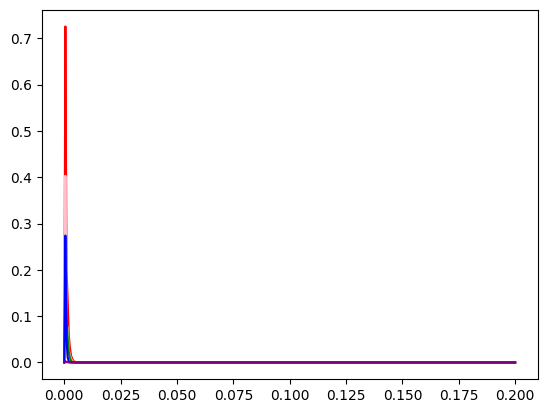

In [ ]:
plt.plot(t_values_2, error_euler_2, color="red")

plt.plot(t_values_2, error_trapezoid_2, color="pink")

plt.plot(t_values_2, error_runge_kutta_2, color="yellow")

plt.plot(t_values_2, error_backward_euler_2, color="green")

plt.plot(t_values_2, error_implicit_trapezoid_2, color="blue")

plt.plot(t_values_2, error_implicit_runge_kutta_2, color="purple")